<a href="https://colab.research.google.com/github/AgusTP/Data-Science/blob/master/Spotify_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spotify 50 songs

Let's do some EDA and visualizations about the dataset:
- It contains the top 50 most listened songs in the world by spotify, their Genre, Beats per minute, and more.


**Importing modules and packages**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud
from google.colab import drive 
drive.mount('/content/gdrive')

%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Getting to know the data**

In [14]:
dataset = pd.read_csv('gdrive/My Drive/top50.csv',encoding='ISO-8859-1')
dataset.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


**The set contains has:**
- 3 categorical columns: 'Track Name', 'Artist Name' and 'Genre'.
- 10 numerical columns: 'BPM', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness (live record)', 'Valence (Mood)', 'Lenght', 'Acousticness', 'Popularity'.

In [15]:
dataset = dataset.drop(['Unnamed: 0'], axis = 1)

In [16]:
dataset.columns = ['Track_Name', 'Artist_Name', 'Genre', 'BPM', 'Energy', 'Danceability', 'dB', 'Liveness','Valence',
                  'Length(s)', 'Acousticness','Speechiness','Popularity']

## EDA and visualizations

**Distribution of features**

In [17]:
hist_data = [dataset['Danceability'], dataset['Popularity'], dataset['Acousticness']]
group_labels = [ 'Danceability','Popularity','Acousticness']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[10, 10,1], colors = ['#F66095', '#2BCDC1', '#393E46'])
fig.update_layout(title_text='Popularity, Danceability and Acousticness')
fig.show()

Top songs seem to be highly danceable and not acoustic!

**Top artists and top Genres**

In [18]:
Artists = pd.DataFrame(dataset['Artist_Name'].value_counts()).reset_index()
Artists.columns = ['Artist','Total songs']

In [19]:
fig = px.bar(Artists, x = 'Artist', y = 'Total songs', color = 'Artist', title='Artist vs amount of top songs')        
fig.show()

In [20]:
Genre = pd.DataFrame(dataset['Genre'].value_counts()).reset_index()
Genre.columns = ['Genre','Total songs']
fig = px.bar(Genre, x = 'Genre', y = 'Total songs', color = 'Genre', title='Genre vs amount of top songs')        
fig.show()

- There are a few top artists with 2 or more songs in the top 50.
- There are mainly three top genres: Dance Pop, Pop and Latin.

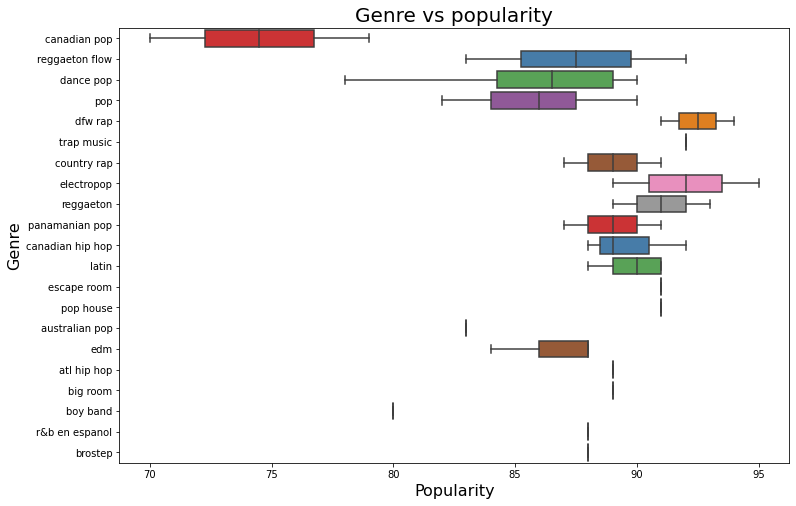

In [21]:
plt.figure(figsize=(12,8))

sns.boxplot(x = "Popularity", y = "Genre", data=dataset, palette = 'Set1')

plt.xlabel('Popularity', fontsize=16)
plt.ylabel('Genre', fontsize=16)
plt.yticks(rotation='0')
plt.title("Genre vs popularity", fontsize=20)
plt.show()

## Let's analyze the correlation between the top 50 songs

In [22]:
x = dataset.columns[3:]
heat = go.Heatmap(z =dataset.corr(),
                  x = x,
                  y = x,
                  xgap=1, ygap=1,
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                  hovertext = dataset.corr(),
                  hoverinfo='text',colorscale=[[0.0, '#F5FFFA'], 
                         [0.2, '#ADD8E6'], 
                         [0.4, '#87CEEB'],
                         [0.6, '#87CEFA'], 
                         [0.8, '#40E0D0'], 
                         [1.0, '#00CED1']]
                   )

title = 'Correlation Matrix'               

layout = go.Layout(title_text=title, title_x=0.5, 
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout)        
fig.show() 

So we can see that there are no clear correlations with 'Popularity'. There is no recipe for a song to be among the top 50!

Correlations seen:
- Speechiness and BPM
- Energy and dB

In [23]:
fig = px.scatter(dataset, x = "Speechiness", y = "BPM", size='Popularity', color = "Genre", title = 'BPM vs. Speechiness')
fig.show()

In [24]:
fig = px.scatter(dataset, x = "Energy", y = "dB", size='Popularity', color = "Genre", title = 'Energy vs. dB')
fig.show()

## Energy vs. Danceability

<Figure size 864x576 with 0 Axes>

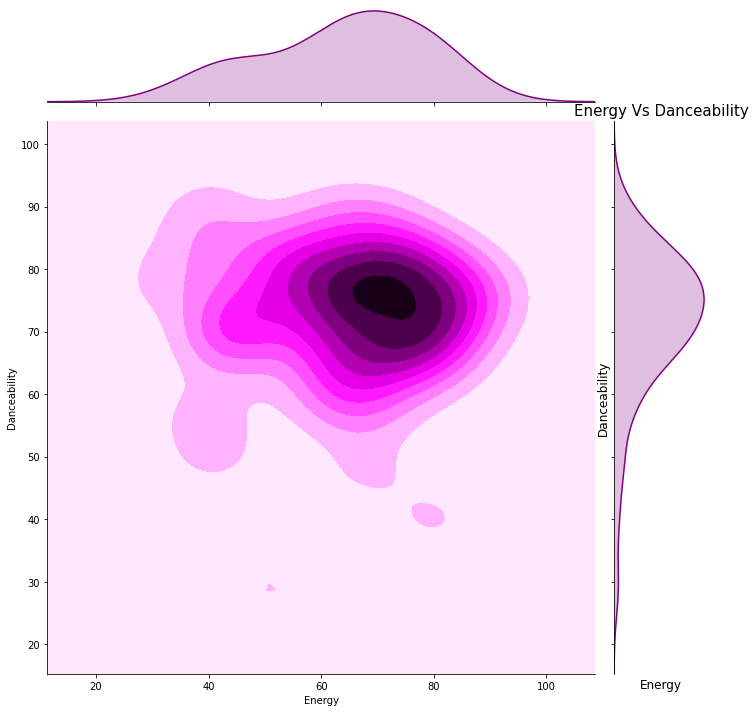

In [25]:
plt.figure(figsize=(12,8))
sns.jointplot(x = dataset["Energy"], y = dataset['Danceability'], height=10 ,kind="kde", color='purple')

plt.ylabel('Danceability', fontsize=12)
plt.xlabel("Energy", fontsize=12)
plt.title("Energy Vs Danceability", fontsize=15)

plt.show()

In [26]:
hist_data = [dataset['Energy'], dataset['Danceability']]
group_labels = [ 'Energy','Danceability']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[10, 10], colors = ['#D4323E', '#3466D4'])
fig.update_layout(title_text='Energy vs Danceability')
fig.show()

## Speechines vs. dB

<Figure size 864x576 with 0 Axes>

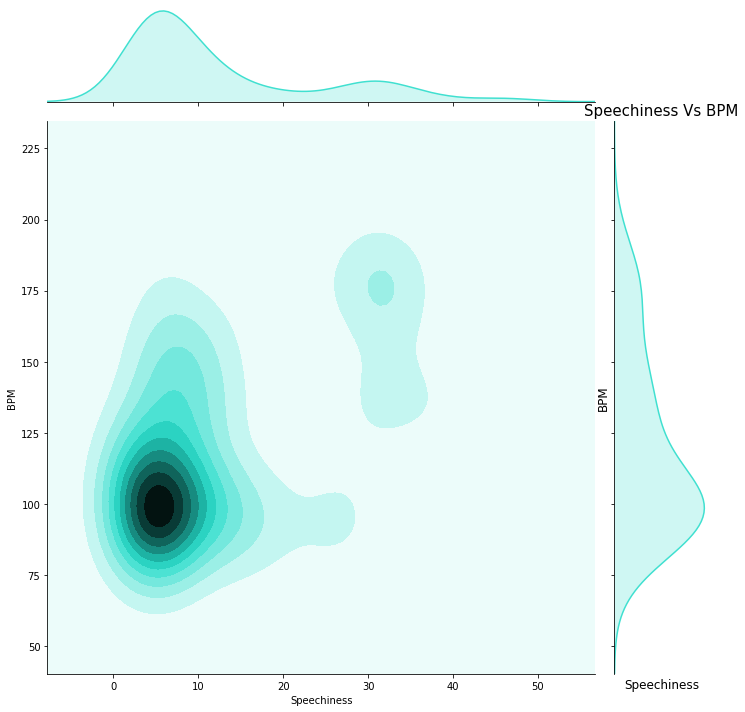

In [27]:
plt.figure(figsize=(12,8))
sns.jointplot(x = dataset["Speechiness"], y = dataset['BPM'], height=10 ,kind="kde", color='turquoise')

plt.ylabel('BPM', fontsize=12)
plt.xlabel("Speechiness", fontsize=12)
plt.title("Speechiness Vs BPM", fontsize=15)

plt.show()

In [28]:
hist_data = [dataset['Speechiness'], dataset['BPM']]
group_labels = [ 'Speechiness','BPM']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[12, 12], colors = ['#2462ab', '#2ba323'])
fig.update_layout(title_text='Speechiness vs BPM')
fig.show()

Now let's see what word is the most repeated in title column!

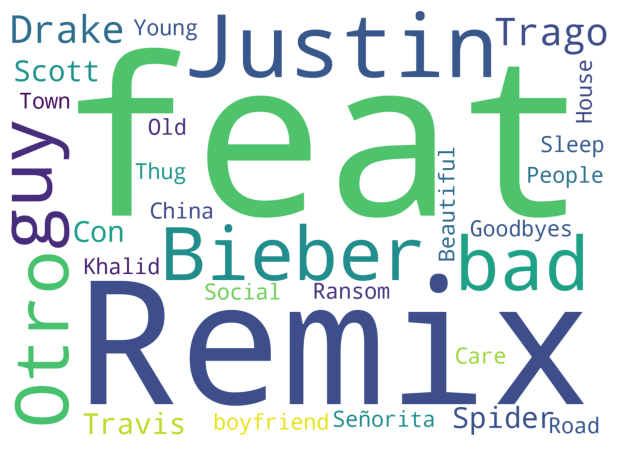

In [29]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='White',max_words = 30,
                           contour_color='black', contour_width=1, 
                          width=1500, margin=10,
                          height=1080
                         ).generate(" ".join(dataset.Track_Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()